In [1]:
from ipywidgets import interact

In [2]:
@interact(x=(0,10),y=(0,10))
def square(x,y):
    return x*y

interactive(children=(IntSlider(value=5, description='x', max=10), IntSlider(value=5, description='y', max=10)…

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread('./sample_images/ada.png')
img=cv2.resize(img,(0,0),fx=.80,fy=.80,interpolation=cv2.INTER_CUBIC)
img_rgb= img[:,:,::-1]
@interact(rl=(0,255),rb=(0,255),gl=(0,255),gb=(0,255),bl=(0,255),bb=(0,255),var=(0,255))
def extract(rl,rb,gl,gb,bl,bb,var):
    out=cv2.inRange(img_rgb,(rl,gl,bl),(rb,gb,bb))
    img2 = cv2.merge((out,out,out))
    img_mask=cv2.bitwise_and(img_rgb,img2)
    hsv=cv2.cvtColor(img_mask,cv2.COLOR_BGR2HSV)
    h,s,v=hsv[:,:,0],hsv[:,:,1],hsv[:,:,2]
    new_h=np.where(h>10,h+var,0)
    new_img=cv2.merge((new_h,s,v))
    out_new=np.where(img2==[255,255,255],new_img,img_rgb)
    plt.imshow(np.hstack((img_rgb,img_mask,new_img,out_new)))

interactive(children=(IntSlider(value=127, description='rl', max=255), IntSlider(value=127, description='rb', …

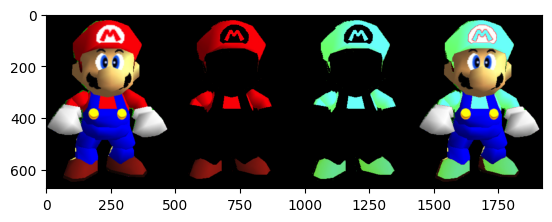